C:\Users\demac\AppData\Local\Temp\ipykernel_16912\3869102235.py:10: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)
C:\Users\demac\AppData\Local\Temp\ipykernel_16912\3869102235.py:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_mean_temperature = df['temp'].resample('Y').mean()


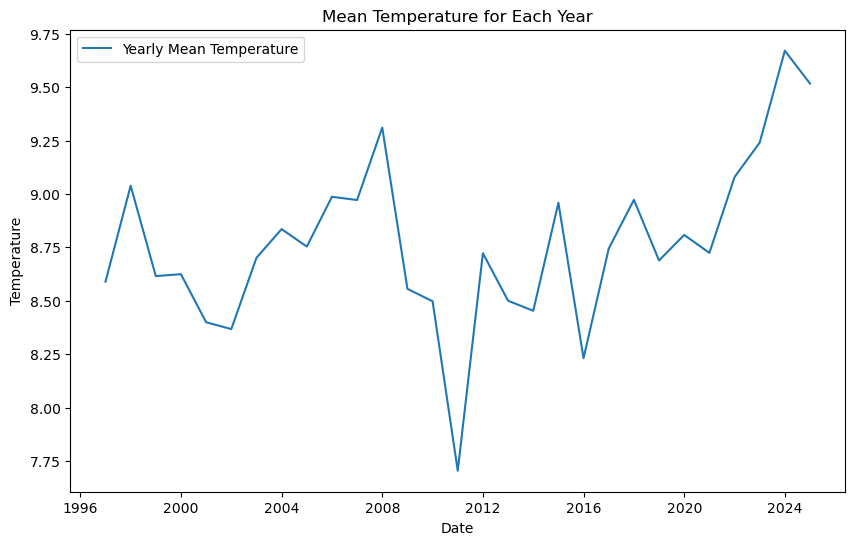

C:\Users\demac\AppData\Local\Temp\ipykernel_16912\3869102235.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_mean_temperature = df['temp'].resample('M').mean()


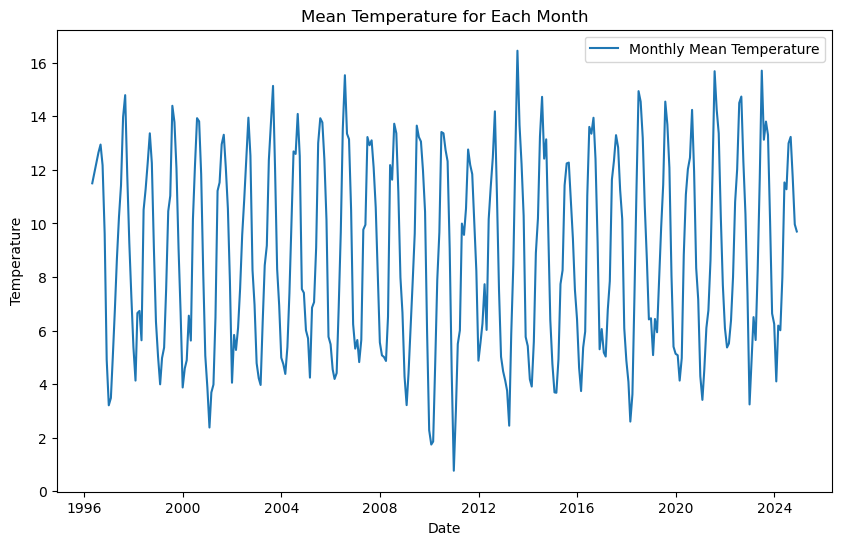

C:\Users\demac\AppData\Local\Temp\ipykernel_16912\3869102235.py:48: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_mean_windspeed = df['wdsp'].resample('Y').mean()


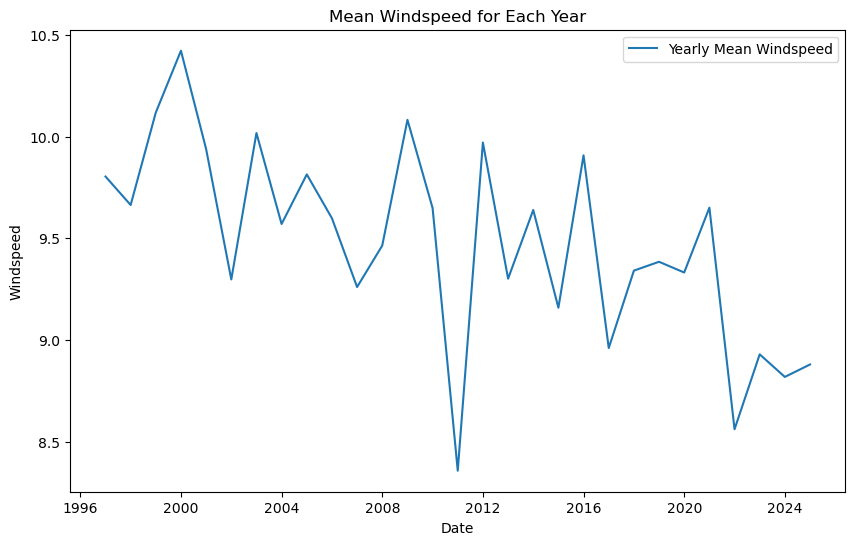

In [10]:
# Knock airport weather
# Author: Andre Machado

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Load the dataset
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)

# Convert the 'date' column to datetime and normalize to remove hours and minutes
df['date'] = pd.to_datetime(df['date'], format="%d-%b-%Y %H:%M", errors='coerce', utc=True).dt.normalize()

# Extract year, month, and day from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Set 'date' as the index for time-based analysis
df.set_index('date', inplace=True)

# Calculate and plot the mean temperature for each day
year_mean_temperature = df['temp'].resample('Y').mean()
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_mean_temperature, label='Yearly Mean Temperature')
plt.title("Mean Temperature for Each Year")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

# Calculate and plot the mean temperature for each month
month_mean_temperature = df['temp'].resample('M').mean()
plt.figure(figsize=(10, 6))
sns.lineplot(data=month_mean_temperature, label='Monthly Mean Temperature')
plt.title("Mean Temperature for Each Month")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

# Convert the windspeed column ('wdsp') to numeric, forcing errors to NaN (this will turn any non-numeric entries into NaN)
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

# Treat zeros as NaN in the windspeed column ('wdsp')
df['wdsp'] = df['wdsp'].replace(0, pd.NA)

# Resample the data to get the mean windspeed per year
yearly_mean_windspeed = df['wdsp'].resample('Y').mean()

# Plotting the mean windspeed per year
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_mean_windspeed, label='Yearly Mean Windspeed')
plt.title("Mean Windspeed for Each Year")
plt.xlabel("Date")
plt.ylabel("Windspeed")
plt.show()
